<a href="https://colab.research.google.com/github/ilovesounds/New_CS_Research/blob/main/CNN_convulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np


In [21]:
import pandas as pd


In [22]:
import tensorflow_datasets as tfds

In [23]:
(train_dataset,test_dataset),info=tfds.load('cats_vs_dogs',split=('train[:80%]','train[80%:]'),as_supervised=True,with_info=True)

In [24]:
len(train_dataset),len(test_dataset)
print(train_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [25]:
for x,y in train_dataset:
  print(x.shape,y.numpy())
  image_1=x.numpy()
  break

(262, 350, 3) 1


In [26]:
import matplotlib.pyplot as plt

In [27]:
import tensorflow as tf
def normalize_img(image,label):
  return tf.cast(image,tf.float32)/255.0,label
def resize_img(image,label):
  return tf.image.resize(image,(224,224)),label


In [28]:
train_dataset=train_dataset.map(normalize_img)
train_dataset=train_dataset.map(resize_img)

In [29]:
SHUFFLE_VAL=len(train_dataset) // 1000
BATCH_SIZE= 4

train_dataset=train_dataset.shuffle(SHUFFLE_VAL)
train_dataset=train_dataset.batch(BATCH_SIZE)

train_dataset=train_dataset.prefetch(tf.data.AUTOTUNE)

In [30]:
test_dataset=test_dataset.map(normalize_img)
test_dataset=test_dataset.map(resize_img)

In [31]:
test_dataset=test_dataset.batch(BATCH_SIZE)
test_dataset=test_dataset.prefetch(tf.data.AUTOTUNE)

In [32]:
for (img,label) in train_dataset:
  print(img.numpy().shape,label.numpy())
  break

(4, 224, 224, 3) [1 0 1 0]


In [33]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inputs=layers.Input(shape=(224,224,3))
  x=layers.Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu')(inputs)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Conv2D(256,5,1,activation='relu')(x)
  x=layers.BatchNormalization()(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Conv2D(384,3,1,activation='relu')(x)
  x=layers.Conv2D(384,3,1,activation='relu')(x)
  x=layers.Conv2D(256,3,1,activation='relu')(x)
  x=layers.MaxPool2D(3,2)(x)
  x=layers.Flatten()(x)
  x=layers.Dense(4096,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  x=layers.Dense(4096,activation='relu')(x)
  x=layers.Dropout(0.5)(x)
  outputs=layers.Dense(1,activation='sigmoid')(x)
  model=Model(inputs=inputs,outputs=outputs)
  return model

model=AlexNet()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,586,689 (82.35 MB)

 Trainable params: 21,585,985 (82.34 MB)

 Non-trainable params: 704 (2.75 KB)

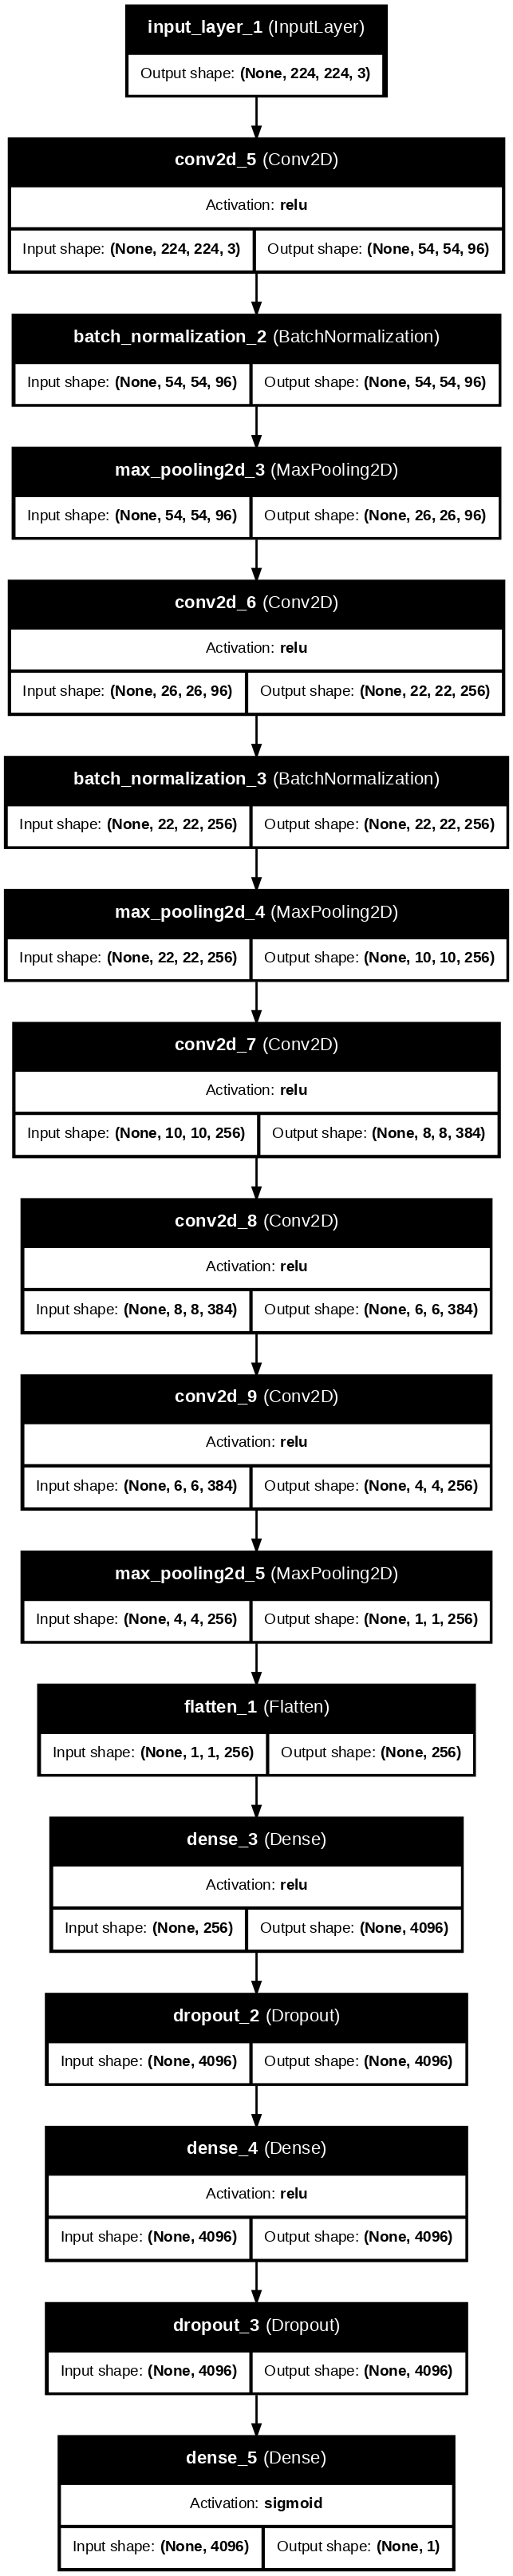

In [34]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,


    show_layer_activations=True,
    dpi=100,

)

In [35]:
for (img,label) in train_dataset:
  print(model(img).numpy().shape,label.numpy())
  print(model(img).numpy())
  break

  break

(4, 1) [0 1 1 0]
[[0.49982363]
 [0.50015426]
 [0.50034815]
 [0.49973443]]


In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer=Adam(learning_rate =0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='loss',patience=5)

In [38]:
# Run this when training your model
history = model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[early_stopping])


Epoch 1/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 99s 20ms/step - accuracy: 0.5453 - loss: 0.6987 - val_accuracy: 0.6905 - val_loss: 0.5964
Epoch 2/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 89s 19ms/step - accuracy: 0.7086 - loss: 0.5642 - val_accuracy: 0.7474 - val_loss: 0.5109
Epoch 3/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 143s 19ms/step - accuracy: 0.7849 - loss: 0.4558 - val_accuracy: 0.7943 - val_loss: 0.4383
Epoch 4/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 141s 19ms/step - accuracy: 0.8215 - loss: 0.3887 - val_accuracy: 0.8057 - val_loss: 0.4140
Epoch 5/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 90s 19ms/step - accuracy: 0.8515 - loss: 0.3333 - val_accuracy: 0.8274 - val_loss: 0.4244
Epoch 6/6
4653/4653 ━━━━━━━━━━━━━━━━━━━━ 91s 20ms/step - accuracy: 0.8665 - loss: 0.3001 - val_accuracy: 0.8347 - val_loss: 0.3815


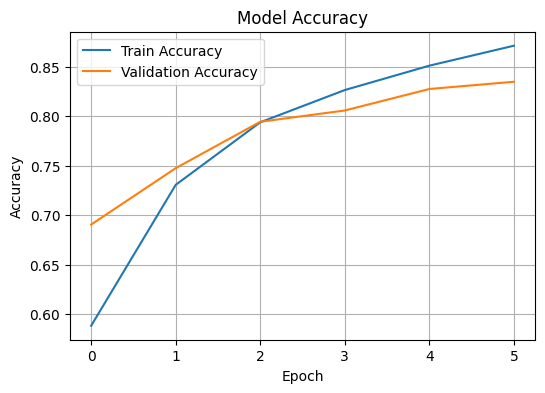

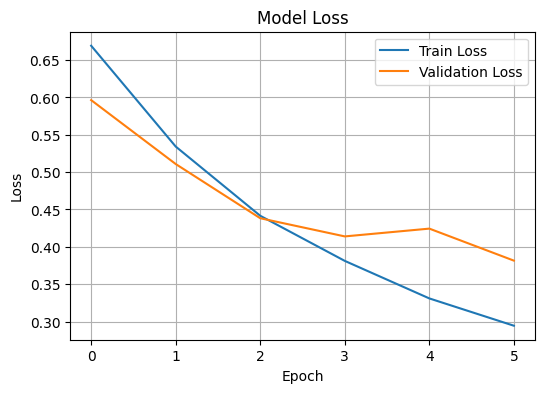

In [39]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
# Plot loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


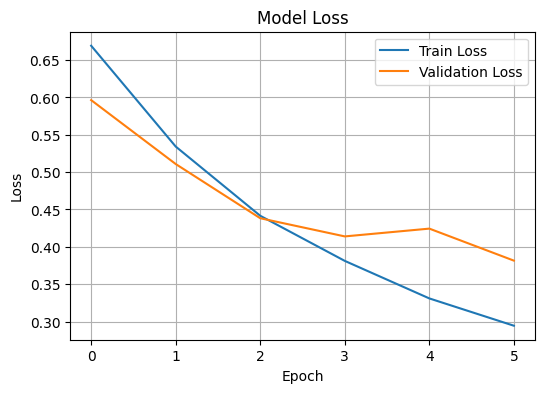

In [40]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
data=pd.read_csv('data/fashion-mnist_test.csv')
print(data.tail(4))

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
5185      4       0       0       0       0       0       0       0       0   
5186      3       0       0       0       0       0       0       0       0   
5187      6       0       0       0       0       0       0       2       0   
5188      5       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
5185       0  ...       0.0       0.0     126.0     152.0     138.0       0.0   
5186       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
5187       0  ...     105.0     118.0      80.0      82.0      94.0      37.0   
5188       0  ...       NaN       NaN       NaN       NaN       NaN       NaN   

      pixel781  pixel782  pixel783  pixel784  
5185       0.0       0.0       0.0       0.0  
5186       0.0       0.0       0.0       0.0  
5187       0.0       0.0       0.0       0.0  
5188      

In [42]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
x_train=x_train/255
x_test=x_test/255

In [44]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [47]:

history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    shuffle=True
)




Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7736 - loss: 0.6178 - val_accuracy: 0.8665 - val_loss: 0.3641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8834 - loss: 0.3158 - val_accuracy: 0.8896 - val_loss: 0.3046
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9046 - loss: 0.2602 - val_accuracy: 0.8920 - val_loss: 0.2866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9190 - loss: 0.2233 - val_accuracy: 0.8996 - val_loss: 0.2874
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9280 - loss: 0.1938 - val_accuracy: 0.8927 - val_loss: 0.2940


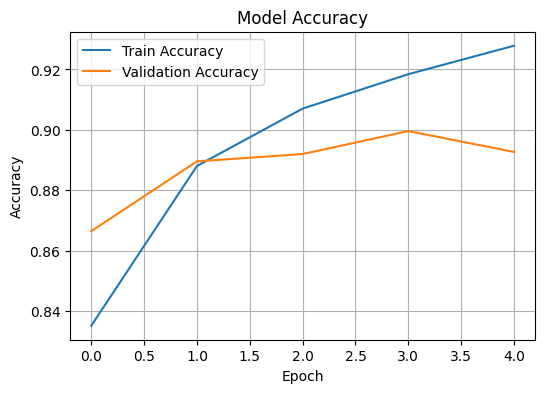

In [48]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3028


[0.29404130578041077, 0.8927000164985657]